In [1]:
%matplotlib inline


In [2]:
import numpy as np
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.stats import binned_statistic
from matplotlib.cm import ScalarMappable

In [3]:
#image_filename = '/Users/willsurgent/Desktop/check_flared_0.1/small_r_1/small_r_1_30.fits'
#image_filename = '/Users/willsurgent/Desktop/check_flared_0.1/small_r_0.1/small_r_0.1_30.fits'
#image_filename = '/Users/willsurgent/Desktop/check_flared_0.1/small_r_0.05/small_r_0.05_30.fits'

image_filename = 'file.fits' #'/Users/willsurgent/Desktop/flat_imag/flat_disk_imag/flat_disk_imag_70.fits'
#'/Users/willsurgent/Desktop/raytrace/raytrace_cpu/python/file.fits'

# '/Users/willsurgent/Desktop/elliptical_disk_imag/ellipse_3.737_imag/ellipse_3.737_imag_70.fits'
# '/Users/willsurgent/Desktop/wedge_disk_imag/flared_disk_1_imag/flared_disk_1_imag70.fits'

#'/Users/willsurgent/Desktop/ss_imag/ss_1.1_imag/ss_1.1_imag_70.fits'

#'/Users/willsurgent/Desktop/flat_imag/flat_disk_imag/flat_disk_imag_70.fits'

#'file.fits' #'test_ellipse_200_40.fits'

In [4]:
with pyfits.open(image_filename) as fits_file:
    enshift = np.array(fits_file['ENSHIFT'].data)    # energy shift from each pixel to observer
    disc_r = np.array(fits_file['RADIUS'].data)      # radius on the disc seen in each pixel
    
enshift[np.isnan(enshift)] = 0

In [5]:
## this is just to define a colourmap to nicely show the disc energy shift
# normalisation for redshift
redshift_vmin = 0.01
redshift_vmax = 1.2
redshift_normpl = 1.
redshift_norm = colors.Normalize(redshift_vmin, redshift_vmax)
# colour map for redshift
redshift_cdict = {'blue': [(0.0, 0, 0),
                           (0.35, 0, 0),
                           (0.8, 0, 0),
                           (0.97, 1, 1),
                           (1.0, 0.6, 0.6)],
                  'green': [(0.0, 0, 0),
                            (0.2, 0, 0),
                            (0.6, 1, 1),
                            (0.75, 1, 1),
                            (0.8, 0.75, 0.75),
                            (0.85, 1.0, 1.0),
                            (0.93, 1.0, 1.0),
                            (0.99, 0, 0),
                            (1.0, 0, 0)],
                  'red': [(0.0, 0, 0),
                          (0.001, 0.5, 0.5),
                          (0.2, 1, 1),
                          (0.7, 1, 1),
                          (0.8, 0, 0),
                          (1.0, 0, 0)]}
redshift_map = colors.LinearSegmentedColormap('RedshiftMap', redshift_cdict)

In [6]:
enshift1 = np.copy(enshift)

In [7]:
enshift2 =np.copy(enshift)

In [8]:
enshift3 =np.copy(enshift)

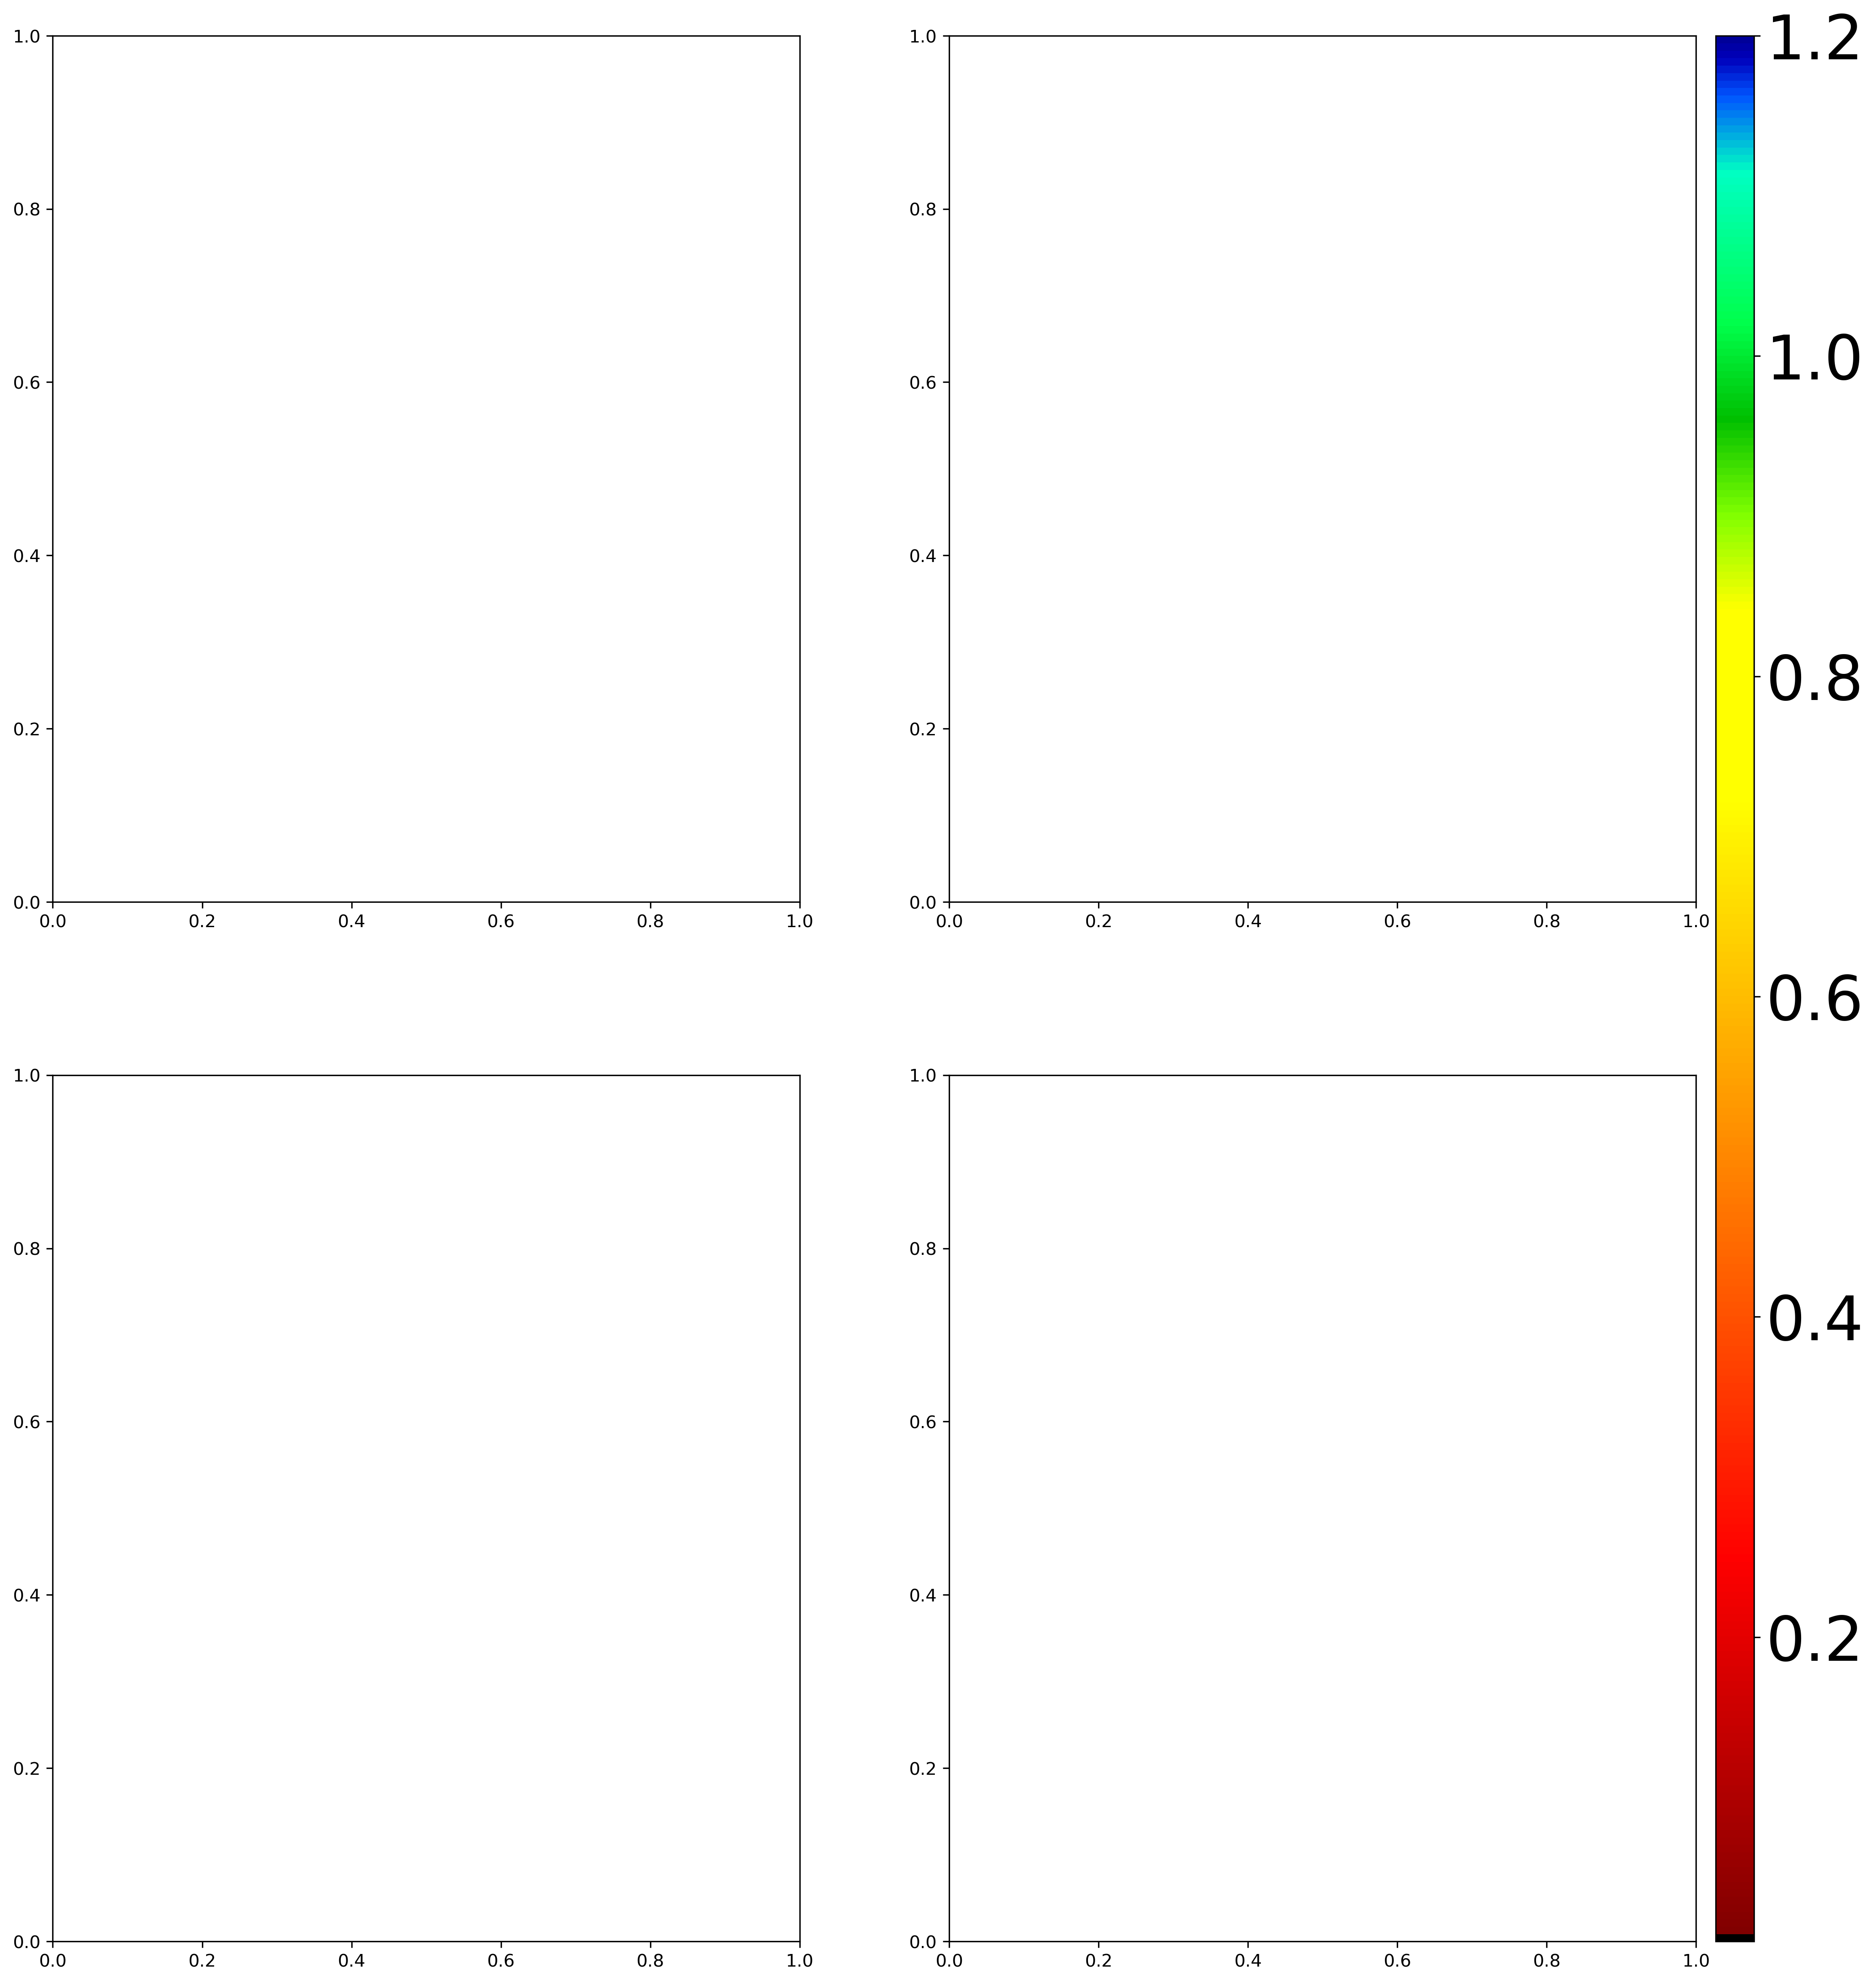

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20), dpi=300)
# xlim1 = 100
# xlim2 = 150

# ylim1 = 100
# ylim2 = 150

# axs[0, 0].imshow(np.flipud(enshift1), norm=redshift_norm, cmap=redshift_map)
# axs[0, 0].set_title('Inclination = 10°', fontsize=30)
# axs[0, 0].set_xlim(xlim1, xlim2)
# axs[0, 0].set_ylim(ylim1, ylim2)

# axs[0, 1].imshow(np.flipud(enshift2), norm=redshift_norm, cmap=redshift_map)
# axs[0, 1].set_title('Inclination = 30°', fontsize=30)
# axs[0, 1].set_xlim(xlim1, xlim2)
# axs[0, 1].set_ylim(ylim1, ylim2)

# axs[1, 0].imshow(np.flipud(enshift3), norm=redshift_norm, cmap=redshift_map)
# axs[1, 0].set_title('Inclination = 50°', fontsize=30)
# axs[1, 0].set_xlim(xlim1, xlim2)
# axs[1, 0].set_ylim(ylim1, ylim2)

# axs[1, 1].imshow(np.flipud(enshift), norm=redshift_norm, cmap=redshift_map)
# axs[1, 1].set_title('Inclination = 70°', fontsize=30)
# axs[1, 1].set_xlim(xlim1, xlim2)
# axs[1, 1].set_ylim(ylim1, ylim2)

# # Adjusting ticks and axis inversion for each plot
# xtick_positions = [100, 125, 150]
# ytick_positions = [100, 125, 150]
# xtick_labels = ['0', '25', '50']
# ytick_labels = ['', '25', '50']

# for ax in axs.flat:
#     ax.set_xticks(xtick_positions)
#     ax.set_xticklabels(xtick_labels)
#     ax.set_yticks(ytick_positions)
#     ax.set_yticklabels(ytick_labels)
#     ax.tick_params(axis='both', which='major', labelsize=30)

#Create a colorbar with the same normalization and colormap
sm = ScalarMappable(norm=redshift_norm, cmap=redshift_map)
sm.set_array([])  # This line is necessary only for Matplotlib versions before 3.1
cb = fig.colorbar(sm, ax=axs.ravel().tolist(), pad=0.01, aspect=50)
#cb.set_label('Redshift Value', size=35)
cb.ax.tick_params(labelsize=35)

plt.show()
plt.show()

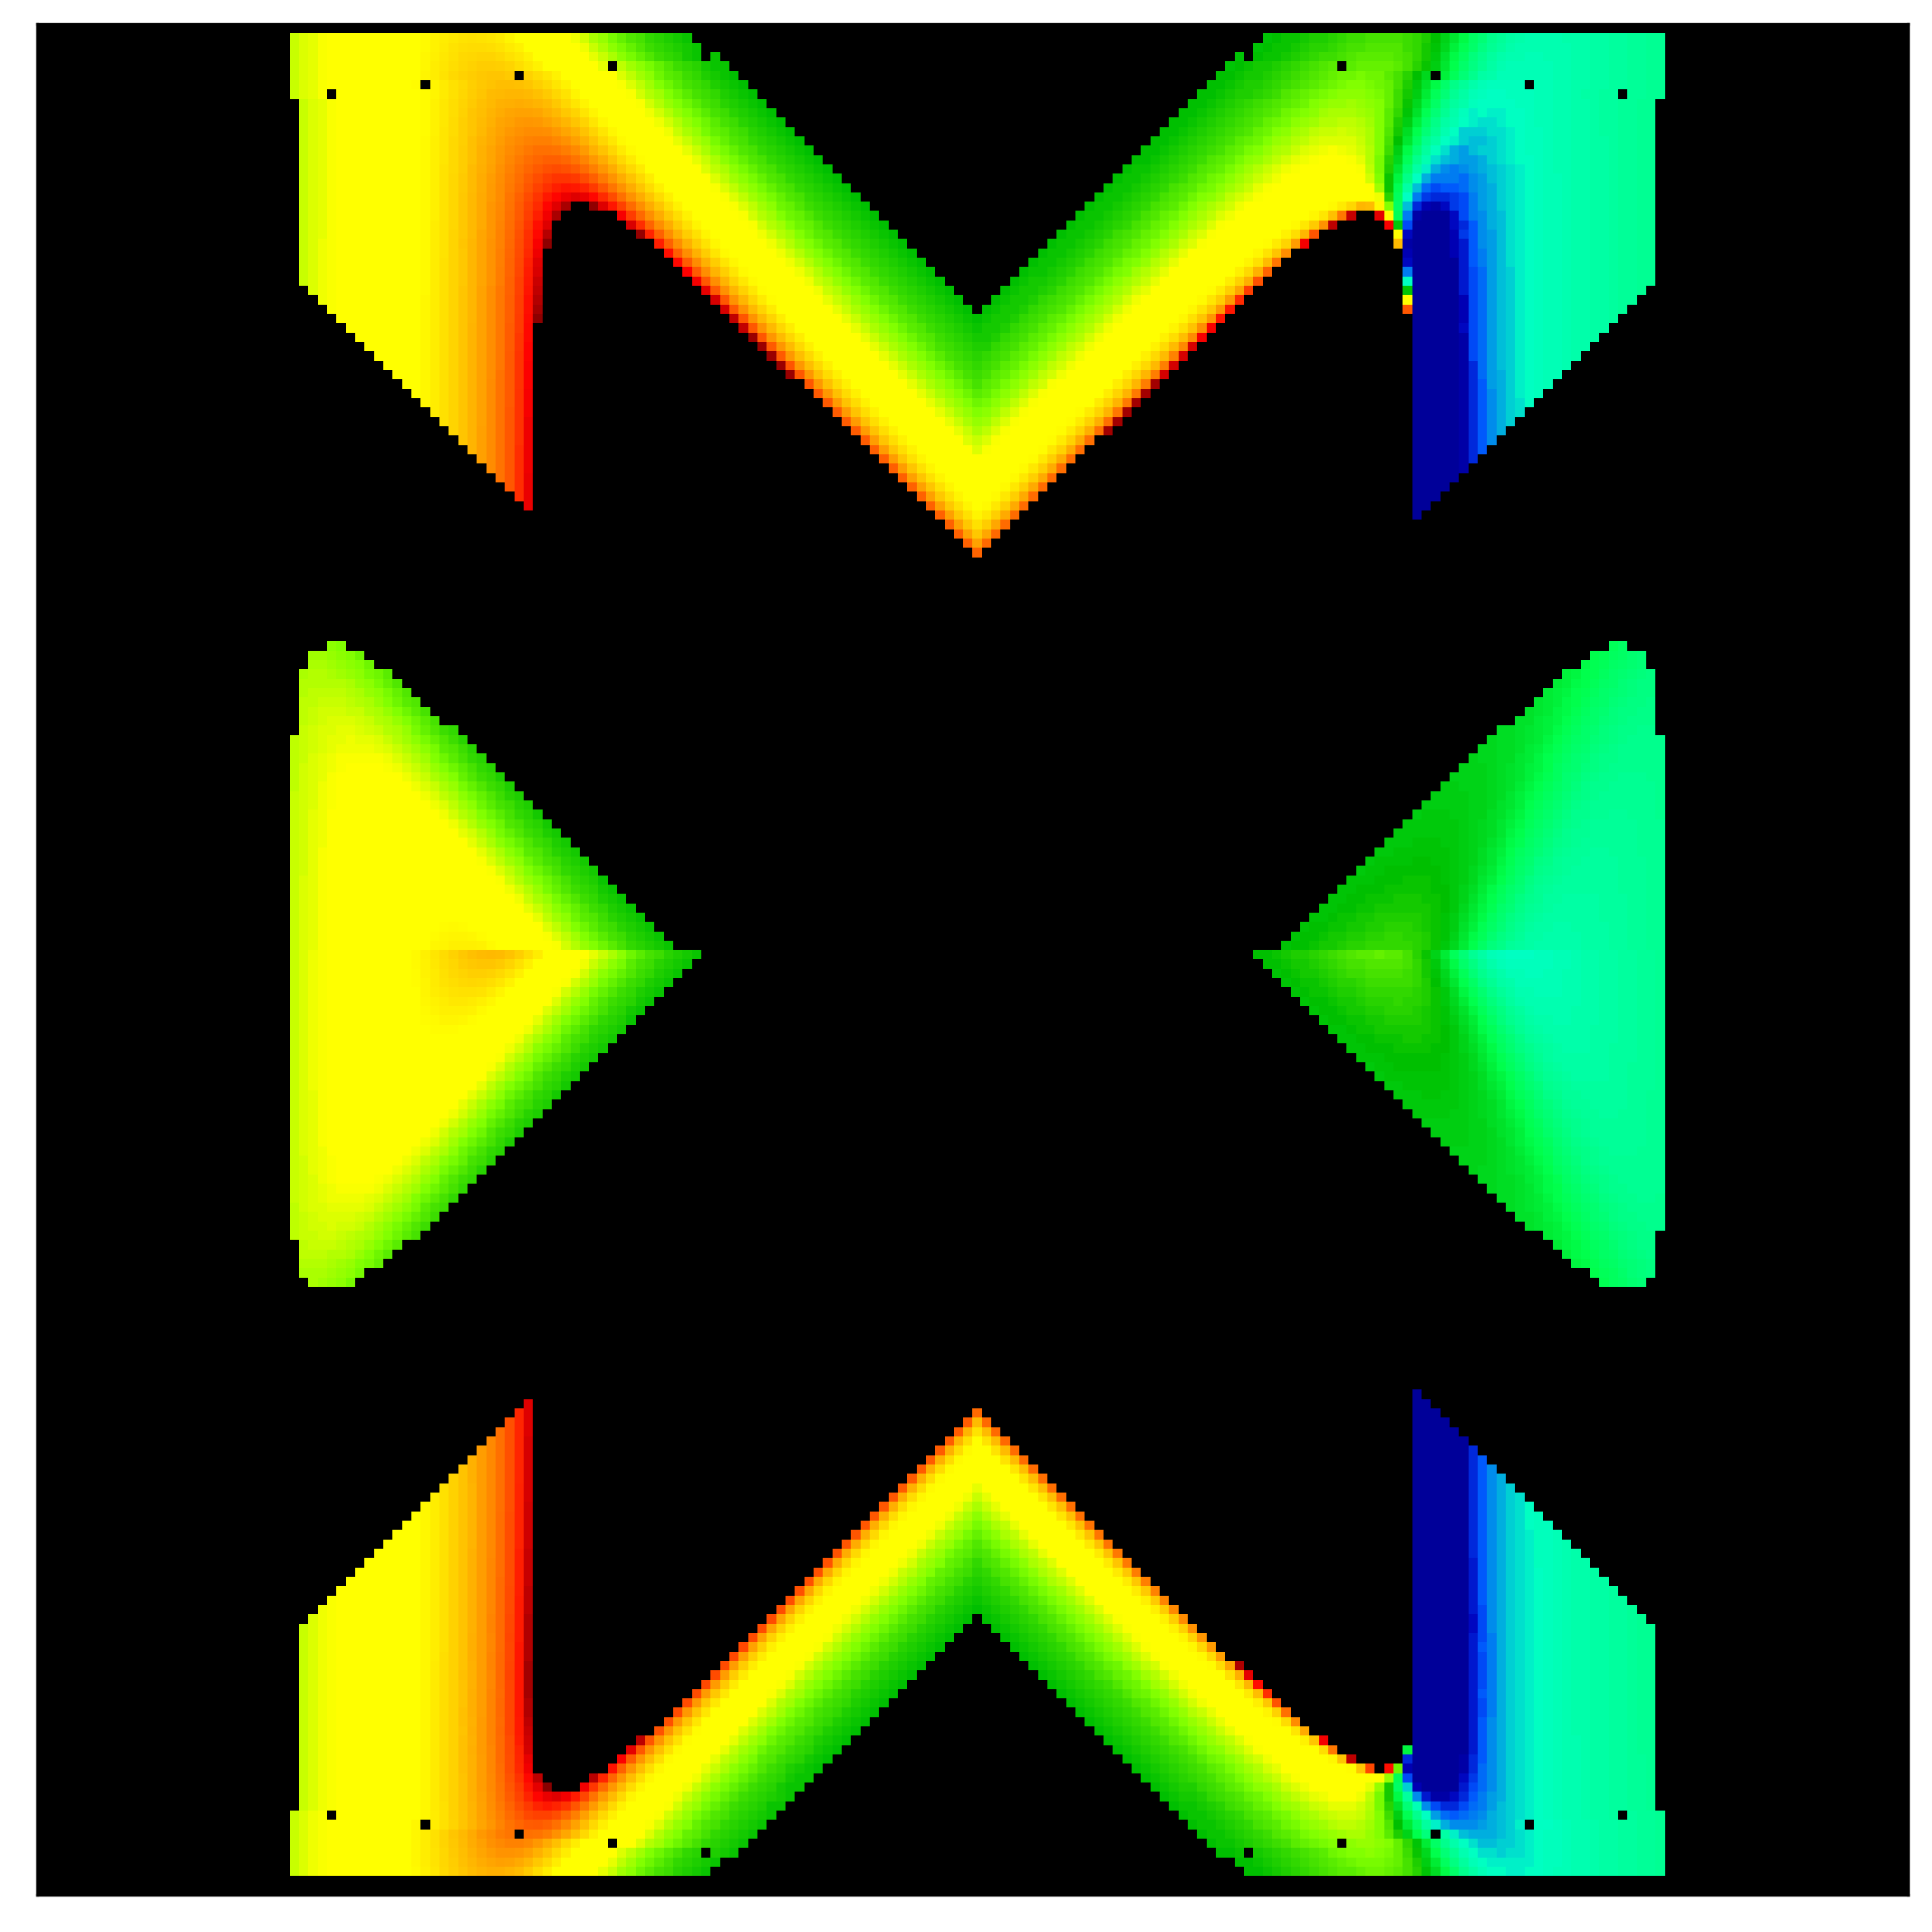

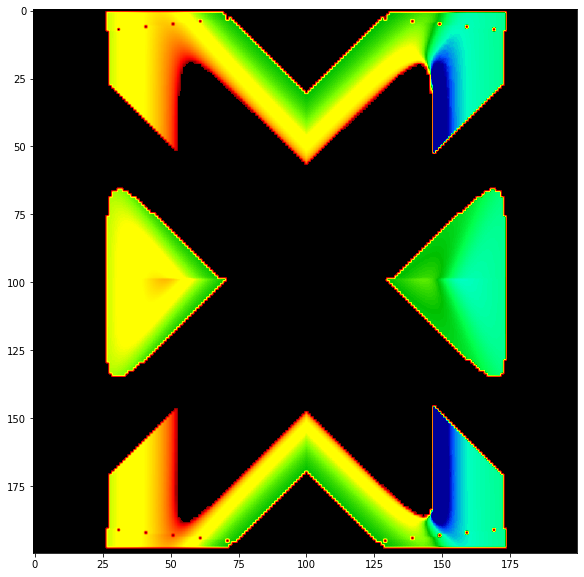

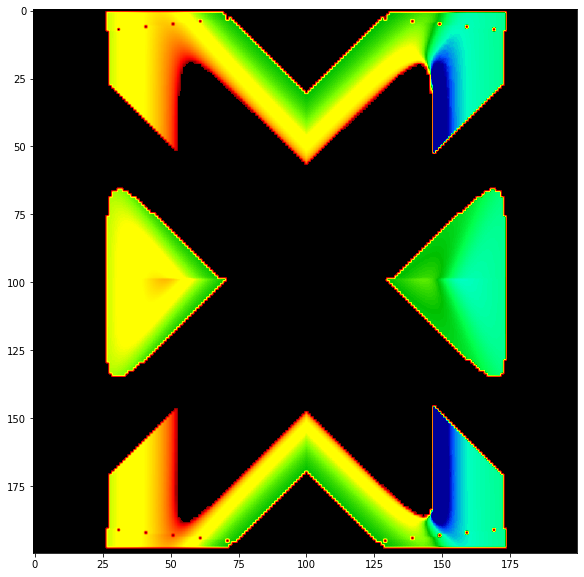

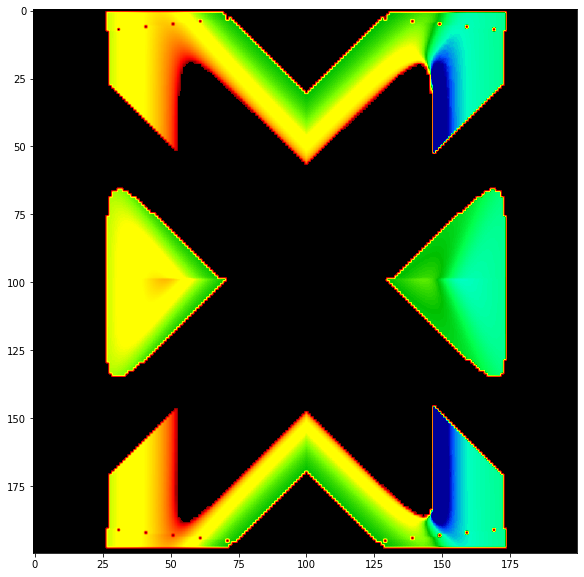

In [10]:
# plot the energy shift as a function of position in the image
plt.figure(figsize=(10,10), dpi=300)
plt.imshow(np.flipud(enshift1), norm=redshift_norm, cmap=redshift_map)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(10,10))
plt.imshow(np.flipud(enshift2), norm=redshift_norm, cmap=redshift_map)
# plt.xlim((100, 150))
# plt.ylim((100, 150))

plt.figure(figsize=(10,10))
plt.imshow(np.flipud(enshift3), norm=redshift_norm, cmap=redshift_map)

plt.figure(figsize=(10,10))
plt.imshow(np.flipud(enshift), norm=redshift_norm, cmap=redshift_map)

In [11]:
# emissivity profile - the luminoisty of each patch of the disc, measured in
# its own rest frame

# we'll use a broken power law
def broken_pl(r, q1, rbreak, q2):
    pl = np.zeros_like(r)
    pl[r <= rbreak] = r[r<=rbreak]**-q1
    pl[r > rbreak] = rbreak**(q2-q1) * r[r>rbreak]**-q2
    return pl

disc_emis = broken_pl(disc_r, 3, 5, 3)

<ipython-input-11-9f6dcd589f81>:7: RuntimeWarning: divide by zero encountered in power
  pl[r <= rbreak] = r[r<=rbreak]**-q1


In [12]:
# flux image of the disc - flux from each patch of the disc is proportional to redshift**3,
# multiplied by the local emissivity of that patch
disc_flux = disc_emis * enshift**3
disc_flux[np.isnan(disc_flux)] = 0

<ipython-input-12-0fe5e3e76baa>:3: RuntimeWarning: invalid value encountered in multiply
  disc_flux = disc_emis * enshift**3


In [13]:
# uncomment these lines to truncate the inner edge of the disc
#r_in = 1.5
#disc_flux[disc_r<r_in] = 0

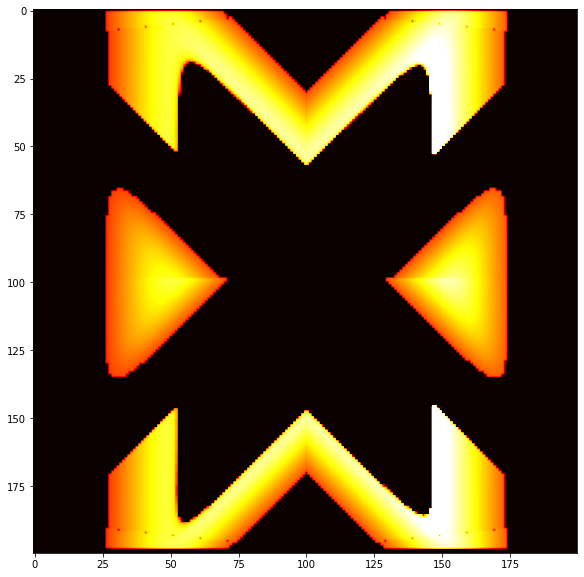

In [14]:
# plot the flux image
flux_min, flux_max = 1e-6*np.max(disc_flux), 0.1*np.max(disc_flux)
plt_disc_flux = np.array(disc_flux)
plt_disc_flux[disc_flux < flux_min] = flux_min
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(plt_disc_flux), norm=colors.LogNorm(flux_min, flux_max), cmap='hot')

In [15]:
# build a line profile by summing up the flux from pixels in the image
# binning the pixels by energy

# rest frame line energy
line_en = 6.4

# edges of the spectral bins
bin_edges = np.arange(1,10,0.1)

# sum up the flux in each bin
line, en_edges, _ = binned_statistic(line_en*enshift.flatten(), disc_flux.flatten()
                                     , statistic='sum', bins=bin_edges)

# work out the mid point of each energy bin from the edges
energy = 0.5*(en_edges[1:] + en_edges[:-1])

In [35]:
line, en_edges, _ = binned_statistic(disc_r.flatten(), disc_flux.flatten()/np.sum(disc_flux.flatten()), statistic='sum', bins=bin_edges)

# calculate cumulative sum to include the sum of previous bins
cumulative_line = np.cumsum(line)

# work out the mid point of each energy bin from the edges
radii = 0.5 * (en_edges[1:] + en_edges[:-1])

ValueError: x and y must have same first dimension, but have shapes (89,) and (198,)

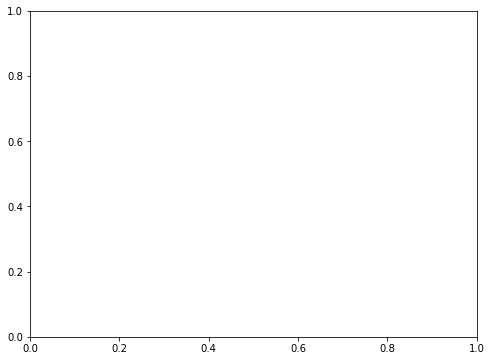

In [42]:
# plot the line
plt.figure(figsize=(8,6))
plt.plot(energy, line)
plt.xlabel('Energy / keV')
plt.ylabel('Count Rate')

Text(0, 0.5, 'Count Rate')

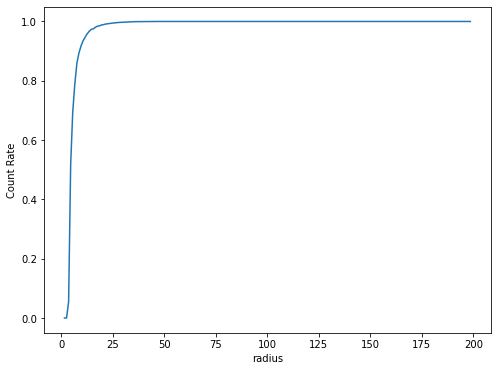

In [43]:
# plot the line
plt.figure(figsize=(8,6))
plt.plot(radii, cumulative_line)
plt.xlabel('radius')
plt.ylabel('Count Rate')

In [57]:
def find_point(cumulative_line):
    total_area = np.trapz(cumulative_line)
    target_area = 0.5 * total_area
    cumulative_sum = np.cumsum(cumulative_line)
    index = np.searchsorted(cumulative_sum, target_area)
    return index

In [ ]:
def find_wedge_slope_angle(cumulative_line):
    

In [58]:
find_point(cumulative_line)

101

In [63]:
np.trapz(cumulative_line[:101])

95.84928181486539

In [60]:
0.5*np.trapz(cumulative_line)

96.42464090743269